# Sentiment Analysis from Tweets

This NLP task implements functions for a text classifier, which aims to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split. 


P.S. It is recommended to read the project report included in the repository associated with this notebook to understand the theory and motivation behind the techniques implemented below.

In [1]:
from data_parser import *

from preprocess_module import *

from training import *

from metrics import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aprog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aprog\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aprog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aprog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\aprog\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
c:\Users\aprog\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and i

In [10]:
raw_data = []          
train_data = []         
test_data = []          

data_file_path = 'data/sentiment-dataset.tsv'
raw_data = load_data(data_file_path) 
print("Loaded %d rawDatapoints" % (len(raw_data)),
      "Preparing the dataset...\n",sep='\n')


Loaded 33540 rawDatapoints
Preparing the dataset...



## Pre-processing improved simplistic implementation:

In [9]:
# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)


unique_labels = list(set([label for (text, label) in raw_data]) )

print("Now %d rawDatapoints" % (len(raw_data)),
      "Preparing training and test data...\n",sep='\n')

train_data, test_data = train_test_split_data(raw_data = raw_data, percentage= 0.8)

print("After split, %d rawData, %d trainData, %d testData\n" % (len(raw_data), len(train_data), len(test_data)) )

Now 33540 rawDatapoints
Preparing training and test data...

After split, 33540 rawData, 26832 trainData, 6708 testData



## 5) BERTweet-based model architecture

## Vectorisation (FeatureUnion)
- **BERTweet embeddings**: `BertweetEmbeddings(model_name="vinai/bertweet-base", max_length=128, batch_size=16, preprocess=light_clean)`  
  *Minimal cleaning (Unicode/URL/emoji); subword tokenizer + contextual [CLS] vectors capture slang, misspellings, and semantics.*
- **Char TF–IDF**: `TfidfVectorizer(analyzer="char", ngram_range=(3, 5))`  
  *Adds robust subword patterns complementary to embeddings.*

## Pipeline Stages
1. **Vectoriser**: `FeatureUnion(BERTweet ⊕ Char TF–IDF)`
2. **Classifier**: `LinearSVC(max_iter=3000, class_weight="balanced")`
3. **Returns** a fitted `sklearn.pipeline.Pipeline` (GPU used if available for embedding step)


In [0]:
print(test_data[0])   # have a look at the first test data instance
classifier = train_classifier(train_data, architecture= 'BERTweet')
vectorizer =  classifier.named_steps['vectorizer']
global_feature_dict = vectorizer.get_feature_names_out() 

print("After split, %d rawData, %d trainData, %d testData\n" % (len(raw_data), len(train_data), len(test_data)),
"\nTraining Samples: ", len(train_data), "\nFeatures:" , len(global_feature_dict))


x_test = [text for (text, label) in test_data]

test_pred = predict_label_from_raw_sklearn(x_test, classifier)       
test_true= [label for (text, label) in test_data]

final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
print("Done training!\n")
print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

("Tomorrow we'll release our 58th episode of #HSonAir profiling our very own @AlissaDosSantos ! We'll talk about storytelling and Beyonce!", 'positive')


Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmprpexzszy/model/model.pkl:   0%|          | 0.00/5…

Done training!
Precision: 0.909996
Recall: 0.909809
F Score:0.909895


### Precision: 0.909996

### Recall: 0.909809

### F1 Score: 0.909895

## Confusion matrix on Test set

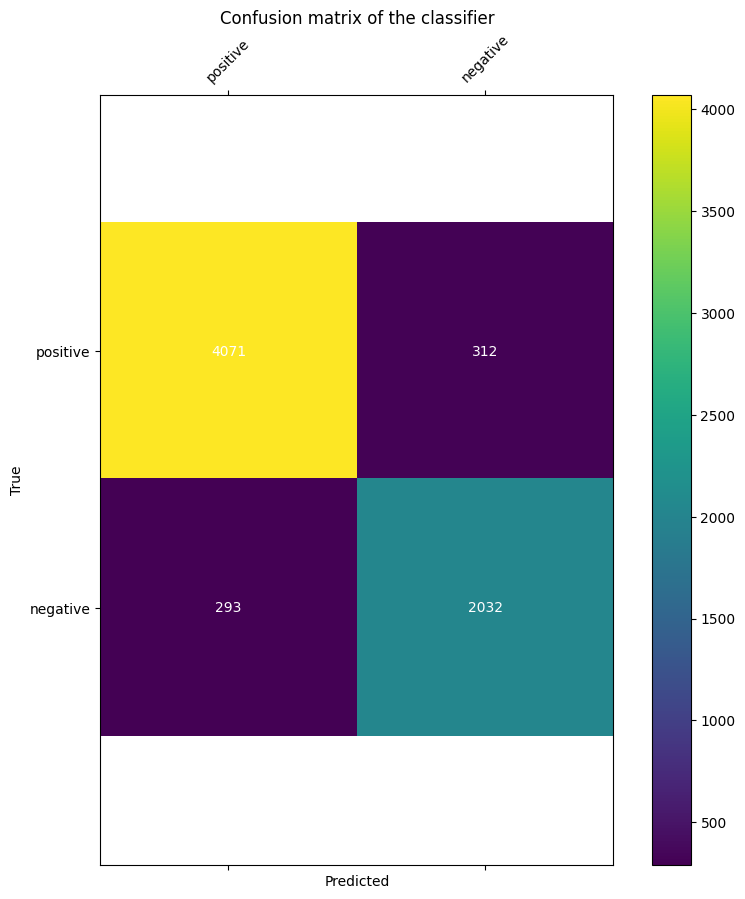

In [0]:
confusion_matrix_heatmap(test_true, test_pred, unique_labels)

# Cross-validation implementation

In [0]:
cross_val_avg_scores = cross_validate(train_data, 10)  

print("Precision: %f\nRecall: %f\nF Score:%f" % cross_val_avg_scores[:3])

config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmp8q_n0z8c/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmp9q5fdtd_/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmpdb8x1x39/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmphkkc_73d/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmprhix2v7b/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmp3d06nrfq/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmp_zqdfpxq/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmpiwka71xr/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmpjyljf7em/model/model.pkl:   0%|          | 0.00/5…

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading /local_disk0/repl_tmp_data/ReplId-19a6e-f6869-9/tmpx65fmu6m/model/model.pkl:   0%|          | 0.00/5…

/root/.ipykernel/1312/command-5644356005708234-712768313:94: RuntimeWarning: Mean of empty slice
  cross_val_avg_scores = tuple(map(float, np.nanmean(arr, axis=0)))


Precision: 0.912230
Recall: 0.911373
F Score:0.911647


## Precision: 0.912230

## Recall: 0.911373

## F Score: 0.911647